# Human Activity Recognition (Running/Walking) on Smartphone Sensor Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from src.preprocessing.data_loader import DataLoader
import matplotlib.gridspec as gridspec
import os

In [2]:
WISDM_LAB_DATA = 'data/wisdm_lab/WISDM_ar_v1.1_raw.txt'
MOTION_SENSE_DATA = 'data/motion_sense'
RUN_WALK_DATA = 'data/run_walk/dataset.csv'
REAL_DATA = 'data/my_iphone_data/'

## _Load the data_

WISDM Lab Data: 
> - sampling rate = 20Hz
> - labels = Jogging, Walking, Upstairs, Downstairs, Sitting, Standing
> - device = Android (front pocket)

MotionSense Data:
> - sampling rate = 50Hz
> - labels = Jogging, Walking, Upstairs, Downstairs, Sitting, Standing
> - device = iPhone 6s (front pocket)

RUN/WALK Data:
> - sampling rate = 50Hz (apparently) 
> - labels = Running, Walking
> - device = iPhone 5 (left and right wrist)

REAL Data:
> - sampling rate = 50Hz 
> - labels = Running, Walking
> - device = iPhone 8 (my iPhone, held against thigh)

In [3]:
data_loader = DataLoader()

In [4]:
real_data_df = data_loader.load_real_data(REAL_DATA)

In [5]:
wisdm_df = data_loader.load_wisdm_data_as_df(WISDM_LAB_DATA)

Loading data from data/wisdm_lab/WISDM_ar_v1.1_raw.txt
WISDM dataset contains 1086465 samples and ['jogging' 'walking' 'upstairs' 'downstairs' 'sitting' 'standing'] as features


In [6]:
wisdm_df.head()

,timestamp,label,acc.x,acc.y,acc.z
0,49105962326000,jogging,-0.694638,12.680544,0.503953
1,49106062271000,jogging,5.012288,11.264028,0.953424
2,49106112167000,jogging,4.903325,10.882658,-0.081722
3,49106222305000,jogging,-0.612916,18.496431,3.023717
4,49106332290000,jogging,-1.184970,12.108489,7.205164


In [7]:
pd.unique(wisdm_df.label)

array(['jogging', 'walking', 'upstairs', 'downstairs', 'sitting',
       'standing'], dtype=object)

In [8]:
motionsense_df = data_loader.load_motion_sense_data_as_df(MOTION_SENSE_DATA)

Loading data from data/motion_sense/dataset.csv
MotionSense dataset contains 1412865 samples and ['downstairs' 'upstairs' 'walking' 'standing' 'sit' 'jogging'] as features
Saved data under data/motion_sense/dataset.csv


In [9]:
motionsense_df.head()

,Unnamed: 0,timestamp,label,acc.x,acc.y,acc.z
0,0,0.0,downstairs,0.282683,-0.254346,-0.407670
1,1,20.0,downstairs,0.256712,0.079154,-0.560291
2,2,40.0,downstairs,0.253600,0.346680,-0.463275
3,3,60.0,downstairs,0.411818,0.459372,-0.510293
4,4,80.0,downstairs,0.311594,0.477305,-0.925049


In [10]:
pd.unique(motionsense_df['label'])

array(['downstairs', 'upstairs', 'walking', 'standing', 'sit', 'jogging'],
      dtype=object)

In [11]:
run_walk_df = data_loader.load_run_walk_data_as_df(RUN_WALK_DATA)

Loading data from data/run_walk/dataset.csv
Run/walk dataset contains 88588 samples and ['walking' 'jogging'] as features


In [12]:
pd.unique(run_walk_df['label'])

array(['walking', 'jogging'], dtype=object)

## _Visualize the data_ 

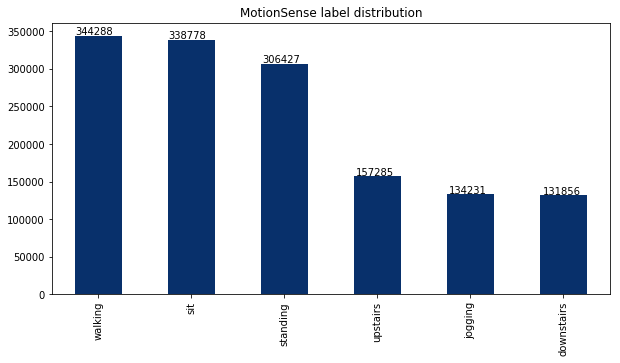

In [13]:
ax = pd.value_counts(motionsense_df['label']).plot(kind='bar', figsize=(10,5), cmap="Blues_r", title="MotionSense label distribution") 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

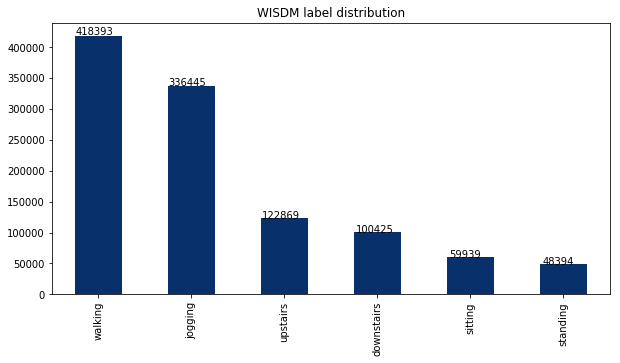

In [14]:
ax = pd.value_counts(wisdm_df['label']).plot(kind='bar', figsize=(10,5), cmap="Blues_r", title="WISDM label distribution") 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

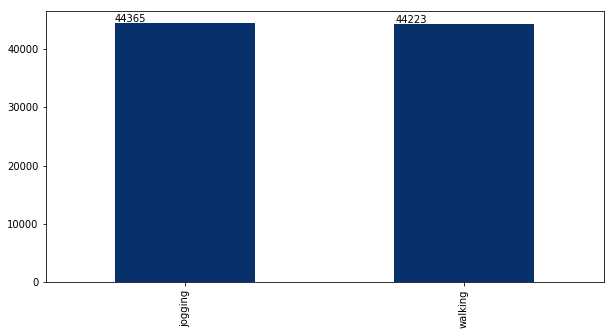

In [15]:
ax = pd.value_counts(run_walk_df['label']).plot(kind='bar', figsize=(10,5), cmap="Blues_r") 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [16]:
# get only run/walk data:
cols = ["walking", "jogging"]
motionsense_df = motionsense_df[(motionsense_df["label"]=="walking") | (motionsense_df["label"]=="jogging")]
wisdm_df = wisdm_df[(wisdm_df["label"]== "walking") | (wisdm_df["label"]=="jogging") ]

In [17]:
def get_activity(df, label, hertz=50, milliseconds=10000):
    every_n_ms = 1000 / hertz
    n_datapoints = int(milliseconds / every_n_ms)
    return df[df["label"] == label][:n_datapoints]

In [18]:
motionsense_walking = get_activity(motionsense_df, "walking", hertz=50) 
motionsense_jogging = get_activity(motionsense_df, "jogging", hertz=50) 

wisdm_walking = get_activity(wisdm_df, "walking", hertz=20)
wisdm_jogging = get_activity(wisdm_df, "jogging", hertz=20)

run_walk_walking = get_activity(run_walk_df, "walking", hertz=20)  # although 50Hz are specified. 
run_walk_jogging = get_activity(run_walk_df, "jogging", hertz=20)  # I honestly doubt that 

real_data_walking = get_activity(real_data_df, "walking", hertz=50)
real_data_jogging = get_activity(real_data_df, "jogging", hertz=50)

/Users/mzu/PycharmProjects/ios_human_activity_recognition/venv/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


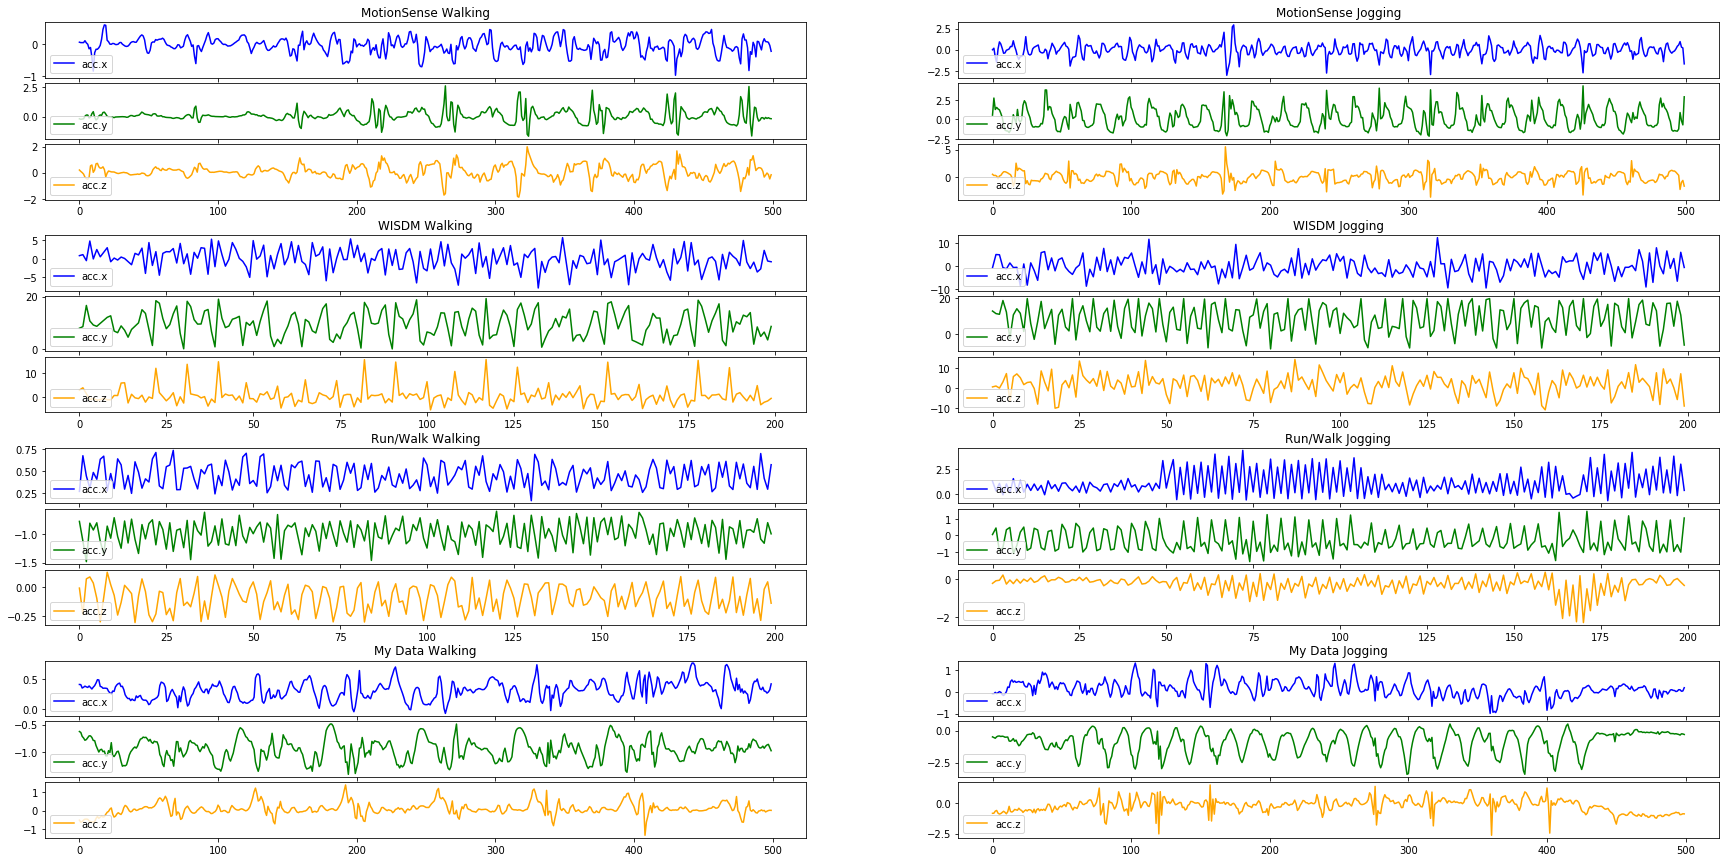

In [19]:
fig = plt.figure(figsize=(30, 15))

outer = gridspec.GridSpec(4, 2, wspace=0.2, hspace=0.2)
accelerations = ["acc.x", "acc.y", "acc.z"]
colors = ['blue', 'green', 'orange']
data = [motionsense_walking, motionsense_jogging, wisdm_walking, wisdm_jogging, run_walk_walking, run_walk_jogging, real_data_walking, real_data_jogging]
titles = ["MotionSense Walking", "MotionSense Jogging", "WISDM Walking", "WISDM Jogging", "Run/Walk Walking", "Run/Walk Jogging", "My Data Walking", "My Data Jogging"]
for i in range(8):
    inner = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)   
    for j in range(3):
        ax = plt.Subplot(fig, inner[j])
        if j == 0:
            ax.set_title(titles[i])
        ax.plot(range(len(data[i])), data[i][accelerations[j]].values, c=colors[j], label=accelerations[j])
        ax.legend(loc='lower left')
        fig.add_subplot(ax)

fig.show()
plt.savefig("docs/resources/n_samples_plot.png")

In [20]:
def plot_n_ms(label: str, df: pd.DataFrame, title: str, hertz=50, milliseconds=10000):
    """
    Plot n milliseconds of accelerometer sensor data with the specified frequency    
    Parameters
    ----------
    label: str
        The label for which we want to plot the data (has to be contained in df.columns)
    df: pandas DataFrame
        The DataFrame for which we want to plot n milliseconds of accelerometer data 
    title: str
        The title for the plot 
    hertz: int
        The frequency with which the data was recorded
    milliseconds: int
        The number of milliseconds we want to plot

    Returns
    -------
    None

    """
    
    every_n_ms = 1000.0/hertz
    n_datapoints = int(milliseconds/every_n_ms)
    
    data = df[df['label'] == label][['acc.x', 'acc.y', 'acc.z']][:n_datapoints]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=title)
    for ax in axis:
        ax.legend(loc='lower left')

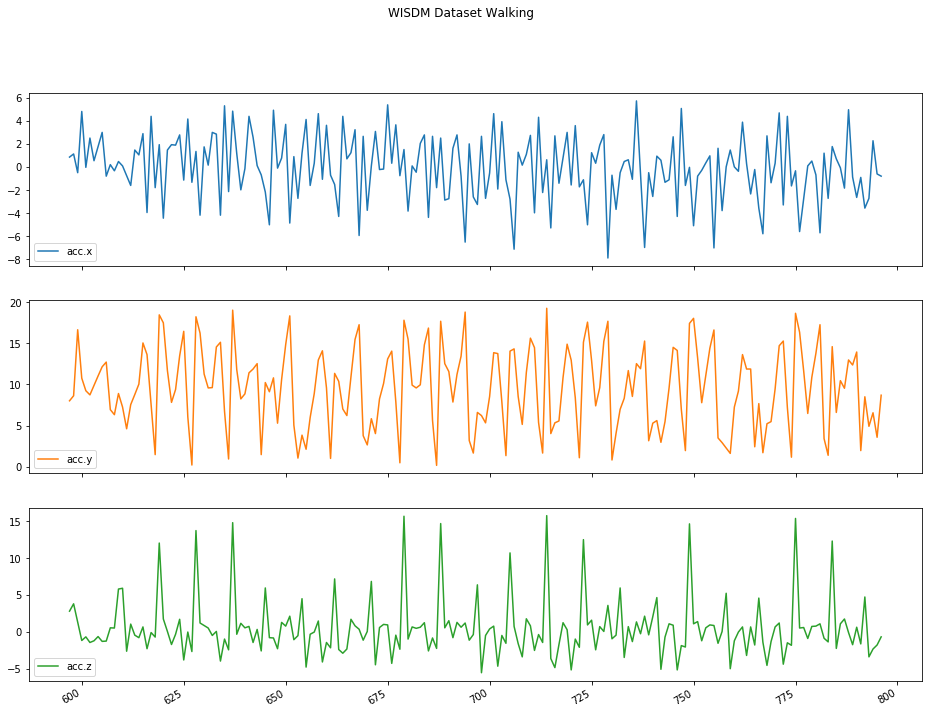

In [21]:
plot_n_ms("walking", wisdm_df, hertz=20, title="WISDM Dataset Walking")

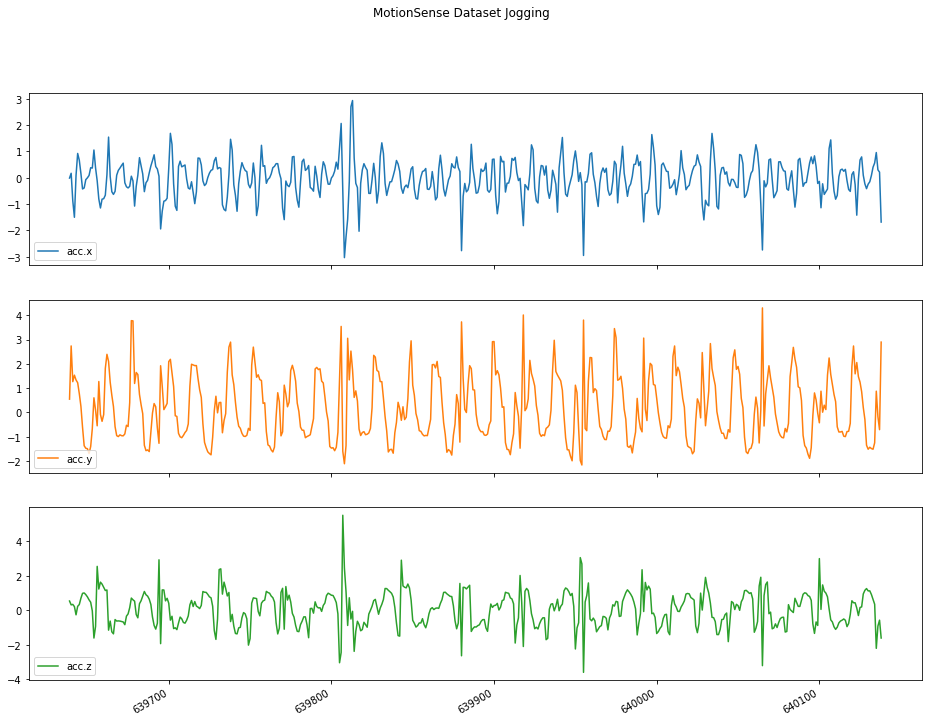

In [22]:
plot_n_ms("jogging", motionsense_df, hertz=50, title="MotionSense Dataset Jogging")

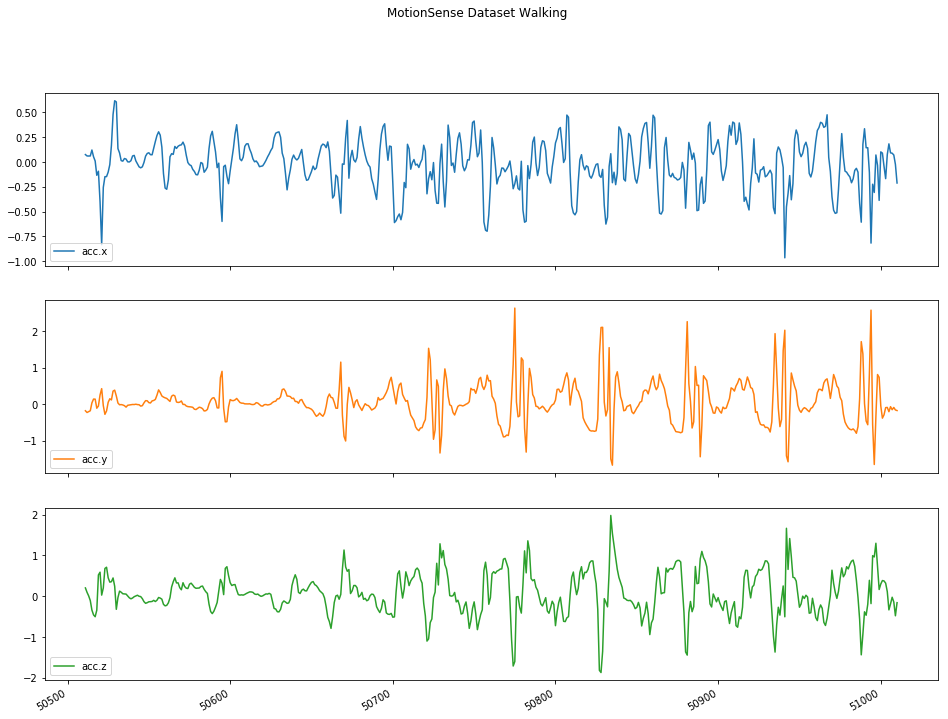

In [23]:
plot_n_ms("walking", motionsense_df, hertz=50, title="MotionSense Dataset Walking")

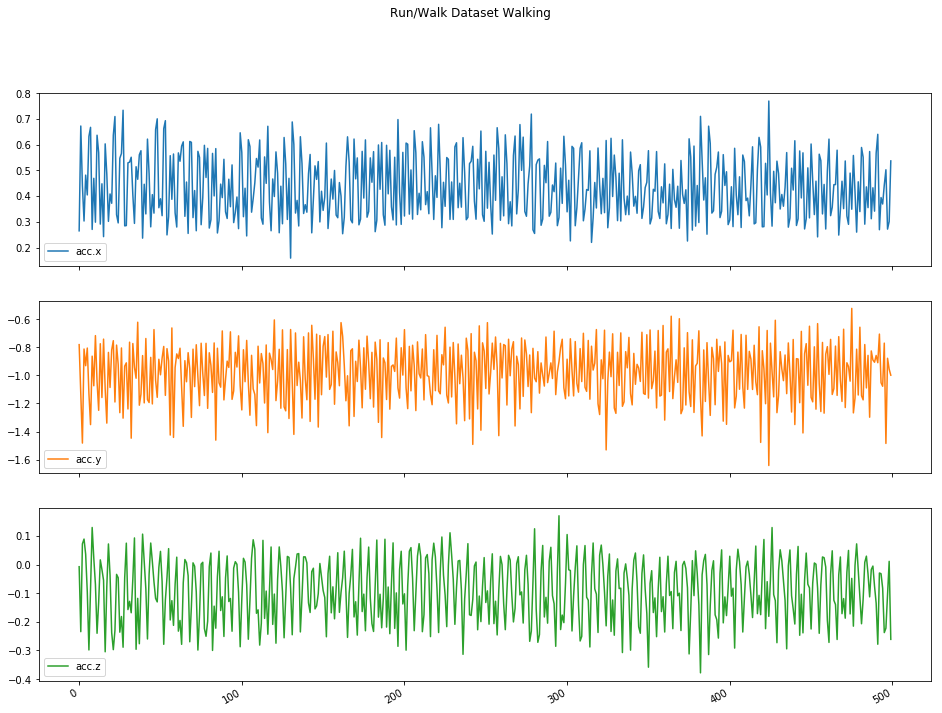

In [24]:
plot_n_ms("walking", run_walk_df, hertz=50, title="Run/Walk Dataset Walking", milliseconds=10000)

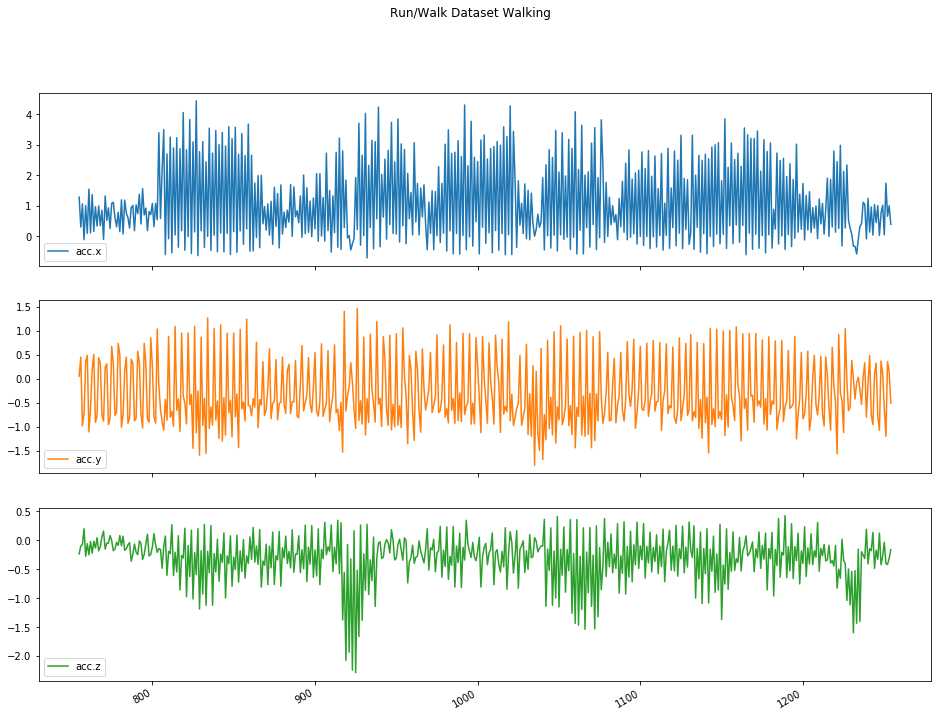

In [25]:
plot_n_ms("jogging", run_walk_df, hertz=50, title="Run/Walk Dataset Walking", milliseconds=10000)

In [26]:
wisdm_df.describe()

,acc.x,acc.y,acc.z
count,754838.000000,754838.000000,754838.000000
mean,0.759203,7.241583,-0.129334
std,7.552907,7.380568,4.918397
min,-19.610000,-19.610000,-19.800000
25%,-3.260000,2.680000,-2.790000
50%,0.460000,7.820000,-0.463092
75%,4.990000,12.450000,2.180000
max,19.950000,20.040000,19.610000


In [27]:
real_data_df.describe()

,timestamp(ms),acc.x,acc.y,acc.z
count,1002.000000,1002.000000,1002.000000,1002.000000
mean,5000.000000,0.229257,-0.909493,-0.049231
std,2893.963541,0.296742,0.642277,0.480352
min,0.000000,-0.987625,-3.414139,-2.631134
25%,2500.000000,0.075237,-1.129200,-0.243996
50%,5000.000000,0.255524,-0.890251,0.009087
75%,7500.000000,0.392902,-0.558399,0.174438
max,10000.000000,1.322815,0.520020,1.521210


In [28]:
run_walk_df.describe()

,acc.x,acc.y,acc.z
count,88588.000000,88588.000000,88588.000000
mean,-0.074811,-0.562585,-0.313956
std,1.009299,0.658458,0.486815
min,-5.350500,-3.299000,-3.753800
25%,-0.381800,-1.033500,-0.376000
50%,-0.059500,-0.759100,-0.221000
75%,0.355500,-0.241775,-0.085900
max,5.603300,2.668000,1.640300


In [29]:
motionsense_df.describe()

,Unnamed: 0,timestamp,acc.x,acc.y,acc.z
count,478519.000000,4.785190e+05,478519.000000,478519.000000,478519.000000
mean,398190.978931,7.963820e+06,-0.015725,0.102446,0.096200
std,244479.371214,4.889587e+06,0.512647,0.832175,0.587168
min,50511.000000,1.010220e+06,-6.369264,-5.673592,-7.743481
25%,170140.500000,3.402810e+06,-0.254597,-0.350731,-0.189393
50%,371381.000000,7.427620e+06,-0.010129,0.015979,0.107773
75%,654239.500000,1.308479e+07,0.224415,0.443009,0.400342
max,903145.000000,1.806290e+07,7.120793,7.322722,8.125357


In [30]:
from scipy.signal import correlate

In [31]:
for acc in accelerations:
    corr_walking_ms = np.mean(correlate(motionsense_walking[acc][:500], real_data_walking[acc][:500]))
    corr_walking_ws = np.mean(correlate(wisdm_walking[acc][:500], real_data_walking[acc][:500]))
    
    corr_jogging_ms = np.mean(correlate(motionsense_jogging[acc][:500], real_data_jogging[acc][:500]))
    corr_jogging_ws = np.mean(correlate(wisdm_jogging[acc][:500], real_data_jogging[acc][:500]))
    
    print("{} - {} correlation on {} = {}".format("MotionSense walking", "Real data walking", acc, corr_walking_ms))
    print("{} - {} correlation on {} = {}".format("MotionSense jogging", "Real data jogging", acc, corr_jogging_ms))
    print()
    print("{} - {} correlation on {} = {}".format("WISDM walking", "Real data walking", acc, corr_walking_ws))
    print("{} - {} correlation on {} = {}".format("WISDM jogging", "Real data jogging", acc, corr_jogging_ws))
    print()
    

MotionSense walking - Real data walking correlation on acc.x = -2.0734961581056477
MotionSense jogging - Real data jogging correlation on acc.x = -1.1543705100866093

WISDM walking - Real data walking correlation on acc.x = -3.366414565824073
WISDM jogging - Real data jogging correlation on acc.x = -3.4228629955001537

MotionSense walking - Real data walking correlation on acc.y = -15.020428343391238
MotionSense jogging - Real data jogging correlation on acc.y = -41.22295551686844

WISDM walking - Real data walking correlation on acc.y = -1291.6103867297556
WISDM jogging - Real data jogging correlation on acc.y = -1053.972358011219

MotionSense walking - Real data walking correlation on acc.z = 1.7879108456938215
MotionSense jogging - Real data jogging correlation on acc.z = -3.437661325619764

WISDM walking - Real data walking correlation on acc.z = 6.570038264822982
WISDM jogging - Real data jogging correlation on acc.z = -47.70455883526545



There is quite some difference between the data collected from the different datasets. What we can directly observe is that Apple's sensor data is in a smaller range than Android's sensor data (has smaller std) and different mean values. The data collected from my iPhone is (not surprisingly) more similar to the motionSense and run/walk datasets. Neverhteless, I will normalize the data for the learning algorithms, as they have used a different iPhone.

## _Normalizing the data_

In [32]:
from src.utilities import zero_mean_unit_variance_normalize_df

In [33]:
motionsense_df_norm, means_motionsense, stds_motionsense = zero_mean_unit_variance_normalize_df(motionsense_df)

In [34]:
motionsense_df_norm.describe()[['acc.x', 'acc.y', 'acc.z']]

,acc.x,acc.y,acc.z
count,4.785190e+05,4.785190e+05,4.785190e+05
mean,9.622015e-18,2.078830e-19,-4.074508e-17
std,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.239360e+01,-6.940899e+00,-1.335170e+01
25%,-4.659592e-01,-5.445688e-01,-4.863904e-01
50%,1.091603e-02,-1.039045e-01,1.971060e-02
75%,4.684319e-01,4.092446e-01,5.179824e-01
max,1.392093e+01,8.676399e+00,1.367439e+01


## _Building train and test sets_

In [35]:
from src.preprocessing.train_test_split import *

Using TensorFlow backend.


In [36]:
targets = ['walking', 'jogging']

In [37]:
n_classes = len(targets)

In [38]:
n_milliseconds = 10000  # 1s for the LIVE-system, 10s for the predict-10s system

In [39]:
X_train_motion, X_test_motion, y_train_motion, y_test_motion = get_train_test_data(motionsense_df_norm, save_to='data/train_test/motionsense_norm.npz', means=means_motionsense, n_classes=n_classes, stds=stds_motionsense, milliseconds=n_milliseconds)  # already saves the data as .npz

X_train shape: (10049, 1500)
y_train shape: (10049, 2)
X_test shape:  (3350, 1500)
y_test shape:  (3350, 1500)


In [40]:
experiments_path = 'data/output/experimental_results'

## _CNN_

In [41]:
from src.model.cnn import ConvolutionalNeuralNetwork

In [42]:
cnn = ConvolutionalNeuralNetwork(save_under=experiments_path)

creating log directory under: data/output/experimental_results/CNN_2019-03-14-19:33:24


In [43]:
model = cnn.build_model(X_train=X_train_motion, y_train=y_train_motion)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 500, 3)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 498, 100)          1000      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 496, 64)           19264     
_________________________________________________________________
dropout_1 (Dropout)          (None, 496, 64)           0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               6500      
__________

Testing model ... 
confusion matrix: 
[[1675    0]
 [   0 1675]]
confusion matrix normalized: 
[[1. 0.]
 [0. 1.]]
              precision    recall  f1-score   support

     walking      1.000     1.000     1.000      1675
     jogging      1.000     1.000     1.000      1675

   micro avg      1.000     1.000     1.000      3350
   macro avg      1.000     1.000     1.000      3350
weighted avg      1.000     1.000     1.000      3350

Overall accuracy = 100.00%
Saved all results to data/output/experimental_results/CNN_2019-03-14-19:33:24


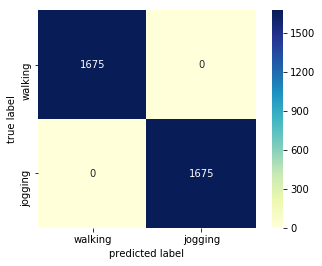

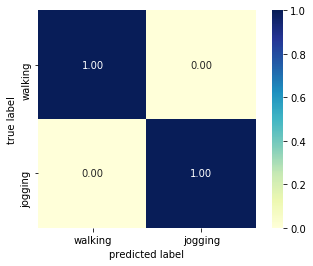

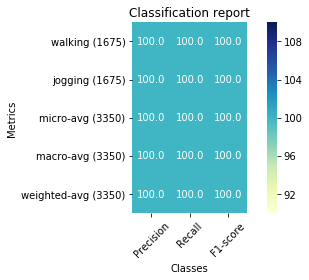

In [44]:
cnn.test_model(X_test=X_test_motion, y_test=y_test_motion, target_names=targets)

## _LSTM_ 

In [40]:
from src.model.lstm import RecurrentNeuralNetwork

In [41]:
rnn = RecurrentNeuralNetwork(save_under=experiments_path)

creating log directory under: data/output/experimental_results/LSTM_2019-03-14-18:50:51


In [42]:
model = rnn.build_model(X_train=X_train_motion, y_train=y_train_motion)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 500, 3)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               83200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 103,502
Trainable params: 103,502
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
10049/10049 [==============================] - 77s 8ms/step - loss: 0.3672 - acc: 0.8249
Epoch 2/5
10049/10049 [=========

Testing model ... 
confusion matrix: 
[[1652    5]
 [   0 1693]]
confusion matrix normalized: 
[[0.9969825 0.0030175]
 [0.        1.       ]]
              precision    recall  f1-score   support

     walking      1.000     0.997     0.998      1657
     jogging      0.997     1.000     0.999      1693

   micro avg      0.999     0.999     0.999      3350
   macro avg      0.999     0.998     0.999      3350
weighted avg      0.999     0.999     0.999      3350

Overall accuracy = 99.85%
Saved all results to data/output/experimental_results/LSTM_2019-03-14-18:50:51


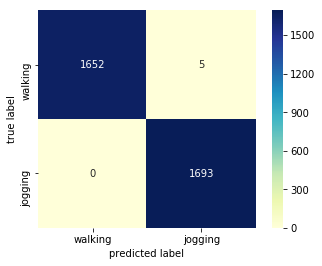

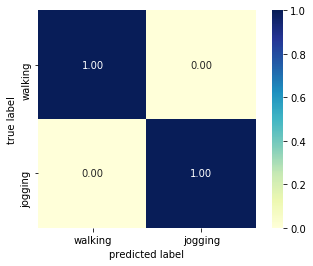

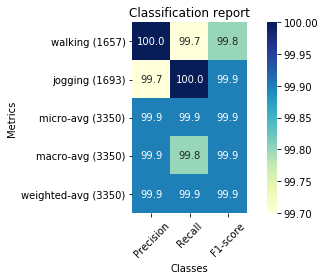

In [53]:
rnn.test_model(X_test=X_test_motion, y_test=y_test_motion, target_names=targets)